# Vector-Vector Multiplication


### $$ \text{Let } a \in \mathbb R ^l \, , b \in \mathbb R ^l$$
### $$ 
\begin{bmatrix}
a_{1} & a_{1} & a_{1}
\end{bmatrix}^T
\begin{bmatrix}
b_{1}\\
b_{2}\\
b_{3}
\end{bmatrix}
= \sum_{i=1} ^l a_{i} \, b_{i} = c,
$$
where the operands are column vectors. The first operand is transposed.


# Matrix-Vector Multiplication

## $$ \text{Let } A \in \mathbb R ^{n \times l} \, , b \in \mathbb R ^{l} \\ Ab = \Big( \sum_{k=1} ^l a_{i,k} \, b_{k} \Big)^{n}$$

### $$ 
\begin{bmatrix}
\color{red}{a_{1,1}} & \color{red}{a_{1,2}} & \color{red}{a_{1,3}}\\
a_{2,1} & a_{2,2} & a_{2,3}\\
a_{3,1} & a_{3,2} & a_{3,3}
\end{bmatrix}
\begin{bmatrix}
\color{green}{b_1} \\
\color{green}{b_2} \\
\color{green}{b_3}
\end{bmatrix}
= \begin{bmatrix}
\color{blue}{c_{1,1}}\\
c_{2,1}\\
c_{3,1}
\end{bmatrix}=
\begin{bmatrix}
\color{blue}{a_{1,1} b_1} + \color{blue}{a_{1,2} b_2} + \color{blue}{a_{1,3} b_3} \\
a_{2,1} b_1 + a_{2,2} b_2 + a_{2,3} b_3 \\
a_{3,1} b_1 + a_{3,2} b_2 + a_{3,3} b_3 
\end{bmatrix}
$$

# Matrix-Matrix Multiplication

## $$ \text{Let } A \in \mathbb R ^{n \times l} \, , B \in \mathbb R ^{l \times m} \\ AB = \Big( \sum_{k=1} ^l a_{i,k} \, b_{k,j} \Big)^{n,m}$$

### $$ 
\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3}\\
\color{red}{a_{2,1}} & \color{red}{a_{2,2}} & \color{red}{a_{2,3}}\\
a_{3,1} & a_{3,2} & a_{3,3}
\end{bmatrix}
\begin{bmatrix}
\color{red}{b_{1,1}} & b_{1,2} & b_{1,3}\\
\color{red}{b_{2,1}} & b_{2,2} & b_{2,3}\\
\color{red}{b_{3,1}} & b_{3,2} & b_{3,3}
\end{bmatrix}
= 
\begin{bmatrix}
c_{1,1} & c_{1,2} & c_{1,3}\\
\color{red}{c_{2,1}} & c_{2,2} & c_{2,3}\\
c_{3,1} & c_{3,2} & c_{3,3}
\end{bmatrix}
$$
where 
### $$ \color{red}{c_{2,1}} = a_{2,1}b_{1,1} + a_{2,2}b_{2,1} + a_{2,3}b_{3,1}$$


Matrix multiplication can be seen as a linear transformation on basis vectors.

# Linear Transformations


A linear transformation $f$ maps a vector space $V$ to another vector space $W$ such that the following hold:

## $$ f(v_1, v_2) = f(v_1) + f(v_2) $$
## $$ f(s v) = s f(v) $$


__Let $W$ be a $n\times m$ matrix, a linear transformation 
is defined $f(v)=Wv$, hence, $v$ is a column vector. Such $f$ is a linear transformation from $\mathbb R^n$ to $\mathbb R^m$__



### 1. Rotation __(when the matrix is orthonormal)__ :

Rotation transformation is encoded in a orthonormal (orthogonal) matrix in which the columns vectors form an orthonormal set, i.e., each column vector of the matrix has length one and is orthogonal to all the other colum vectors.
 
### 2. Scaling __(when the matrix is diagonal)__

Scaling transformation is encoded in a diagonal matrix in which all values are zero zero accept the main diagonal.

### 3. Reflection __(when the determinant is negative)__

Reflection transformation is encoded in a matrix whise determinant is negative

### 4. Shearing

WIKI: A shear matrix a matrix that represents the addition of a multiple of one row or column to another. Such a matrix may be derived by taking the identity matrix and replacing one of the zero elements with a non-zero value.


## 1. [Rotation](https://en.wikipedia.org/wiki/Rotation_matrix)

### $$ 
90 ° \text{rotation}=\begin{bmatrix}
0 & -1 \\
1 & 0\\
\end{bmatrix}, 180° \text{rotation}=\begin{bmatrix}
-1 & 0 \\
0 & -1\\
\end{bmatrix}, 270° \text{rotation}=\begin{bmatrix}
0 & 1 \\
-1 & 0\\
\end{bmatrix}
$$

In [1]:
import torch
w90=torch.FloatTensor([[0,-1],[1,0]])
print(f'90° rotation:\n{w90}')
print(f'180° rotation: \n{w90@w90}')
print(f'270° rotation: \n{w90@w90@w90}')

90° rotation:
tensor([[ 0., -1.],
        [ 1.,  0.]])
180° rotation: 
tensor([[-1.,  0.],
        [ 0., -1.]])
270° rotation: 
tensor([[ 0.,  1.],
        [-1.,  0.]])


In [2]:
import matplotlib.pyplot as plt
# Curtousy of one and only Alfredo Canziani! :)
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

def show_scallter_plot(X,W=None,axs=None,title='Title',width=0.04,eigen=False,show_basis=False):
    if W is not None:
        Y=X@W
    else:
        Y=X
    axs.axis('equal')
    axs.scatter(Y[:, 0], Y[:, 1], c=X[:, 0], s=30)
    # plt.grid(True)
    if eigen and W is not None:
        U, S, V = torch.svd(W)
        # plot transformed points
        title=' y=Wx, singular val.:[{:.3f}, {:.3f}]'.format(S[0], S[1])

    axs.set_title(title)
    axs.axis('off')
    bases = torch.cat((torch.zeros(2, 2), torch.eye(2)))
    bases[2:] -= bases[:2]
    axs.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    axs.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)
set_default()    

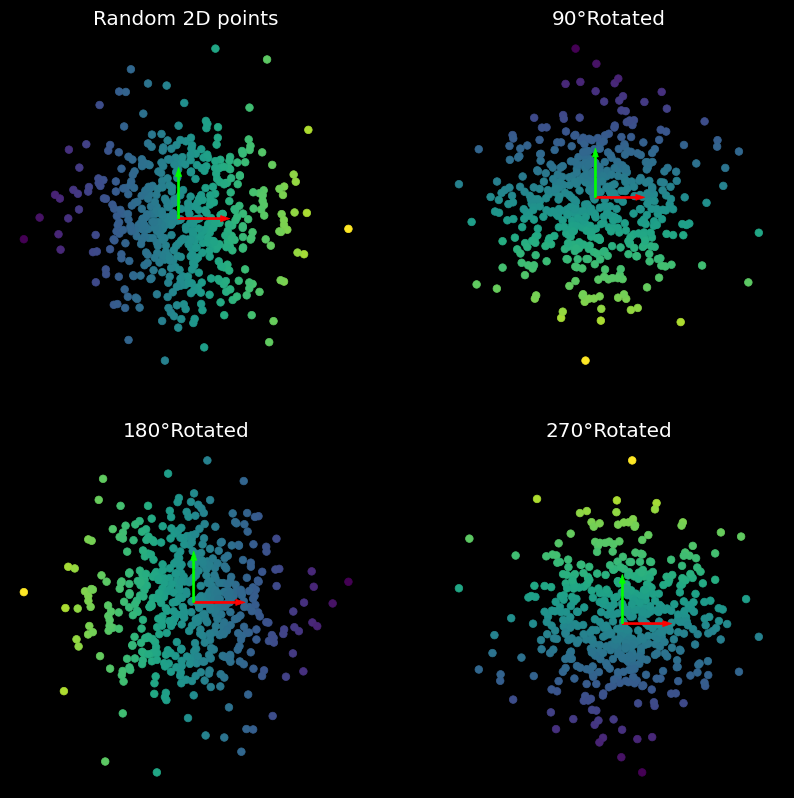

In [3]:
N=500
X = torch.randn(N, 2)
fig, axes = plt.subplots(2, 2)
axes=axes.flatten()
show_scallter_plot(X,None,axes[0],title='Random 2D points')
show_scallter_plot(X,w90,axes[1],title='90°Rotated')
show_scallter_plot(X,w90@w90,axes[2],title='180°Rotated')
show_scallter_plot(X,w90@w90@w90,axes[3],title='270°Rotated')
plt.plot()
plt.show()

## 2. Scaling

Scaling operation can be visualised as squeezing or strecthing data points.

## $$ 
\begin{bmatrix}
a & 0 \\
0 & b\\
\end{bmatrix}
$$

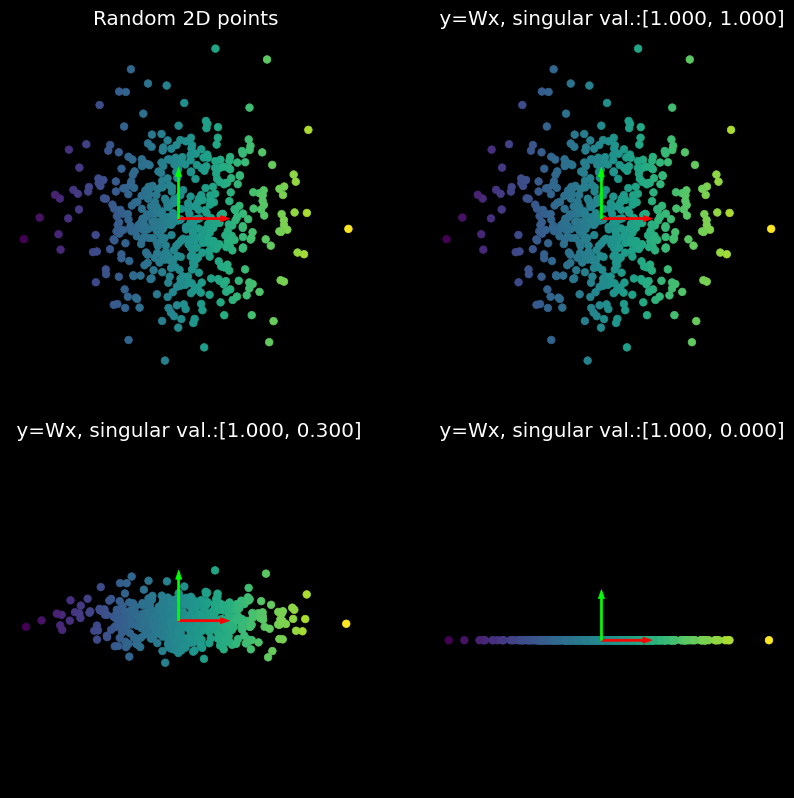

In [4]:
fig, axes = plt.subplots(2, 2)
axes=axes.flatten()
show_scallter_plot(X,None,axes[0],title='Random 2D points')

W=torch.FloatTensor([[1,0],
                     [0,1]])

show_scallter_plot(X,W,axes[1],eigen=True)
show_scallter_plot(X,
                   torch.FloatTensor([[1,0],
                                      [0,.3]]),
                   axes[2],eigen=True)
show_scallter_plot(X,torch.FloatTensor([[1,0],
                                        [0,0]]),
                   axes[3],eigen=True)

plt.plot()
plt.show()

## 3. Reflection

## $$ 
\begin{bmatrix}
a & b \\
c & d\\
\end{bmatrix} \text{ if } ad-bc < 0 \textbf{ when the determinant is negative}
$$



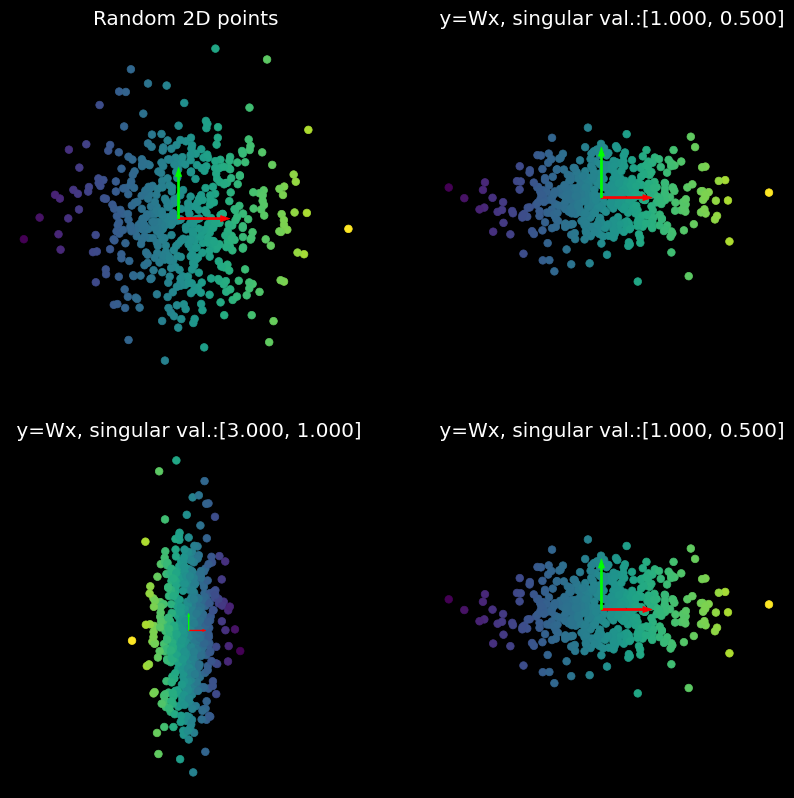

In [5]:
fig, axes = plt.subplots(2, 2)
axes=axes.flatten()
show_scallter_plot(X,None,axes[0],title='Random 2D points')

W=torch.FloatTensor([[1,0],
                     [0,1]])

show_scallter_plot(X,torch.FloatTensor([[1,0],
                                        [0,-.5]]),axes[1],
                   eigen=True)

show_scallter_plot(X,torch.FloatTensor([[-1,0],
                                        [0,3]]),axes[2],
                   eigen=True)


show_scallter_plot(X,torch.FloatTensor([[1,0],
                                        [0,-.5]]),axes[3],
                   eigen=True)

plt.plot()
plt.show()

## 4. [Shear Matrix](https://en.wikipedia.org/wiki/Shear_matrix)

## $$\begin{bmatrix}
1 & \lambda \\
0 & 1\\
\end{bmatrix}
$$

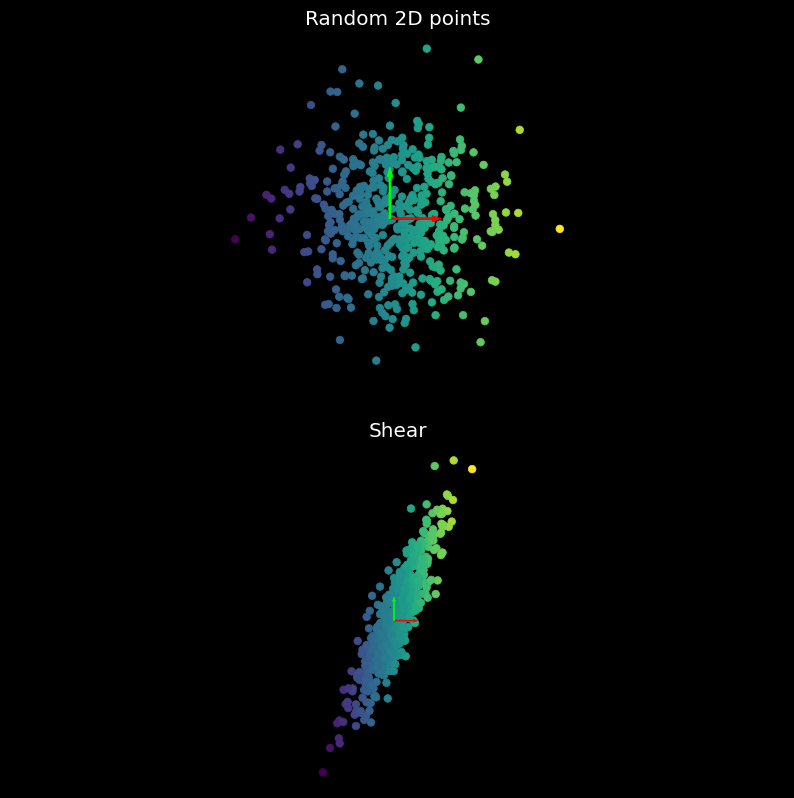

In [6]:
fig, axes = plt.subplots(2)
axes=axes.flatten()
W=torch.FloatTensor([[1,2],
                     [0,1]])
show_scallter_plot(X,None,axes[0],title='Random 2D points')
show_scallter_plot(X,W,axes[1],title='Shear')
plt.plot()
plt.show()

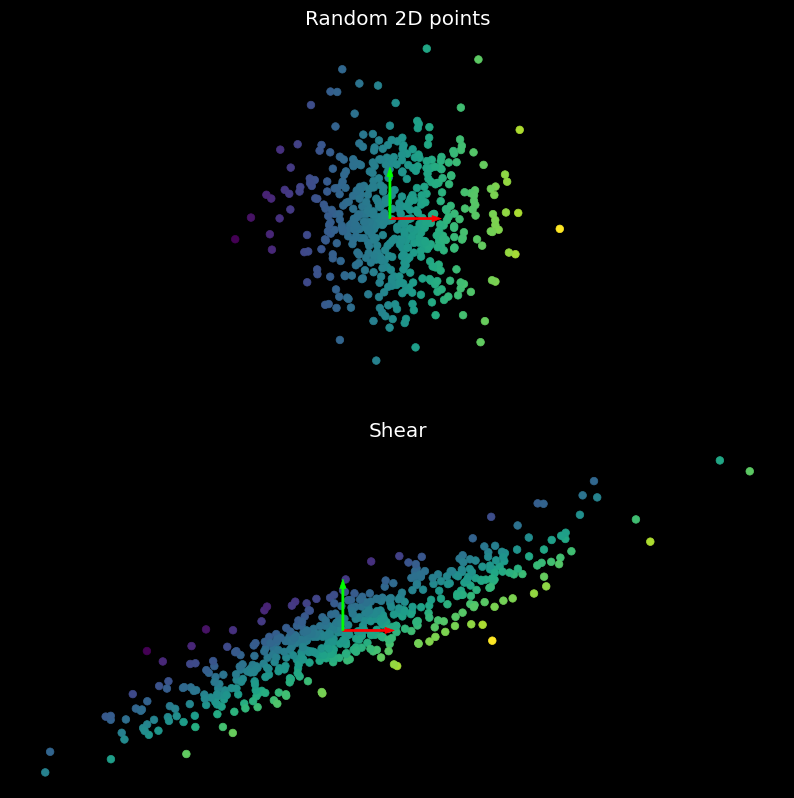

In [7]:
fig, axes = plt.subplots(2)
axes=axes.flatten()
W=torch.FloatTensor([[1,0],
                     [2,1]])
show_scallter_plot(X,None,axes[0],title='Random 2D points')
show_scallter_plot(X,W,axes[1],title='Shear')
plt.plot()
plt.show()

# Non-linear transformations

+ Linear transformation can rotate, reflect, strecth, and compress but cannot curve

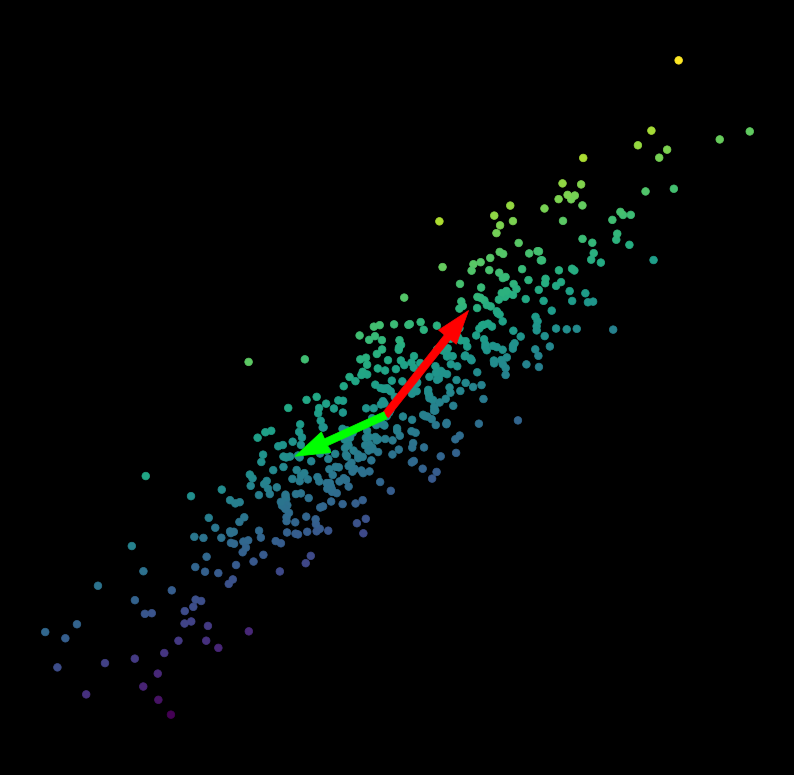

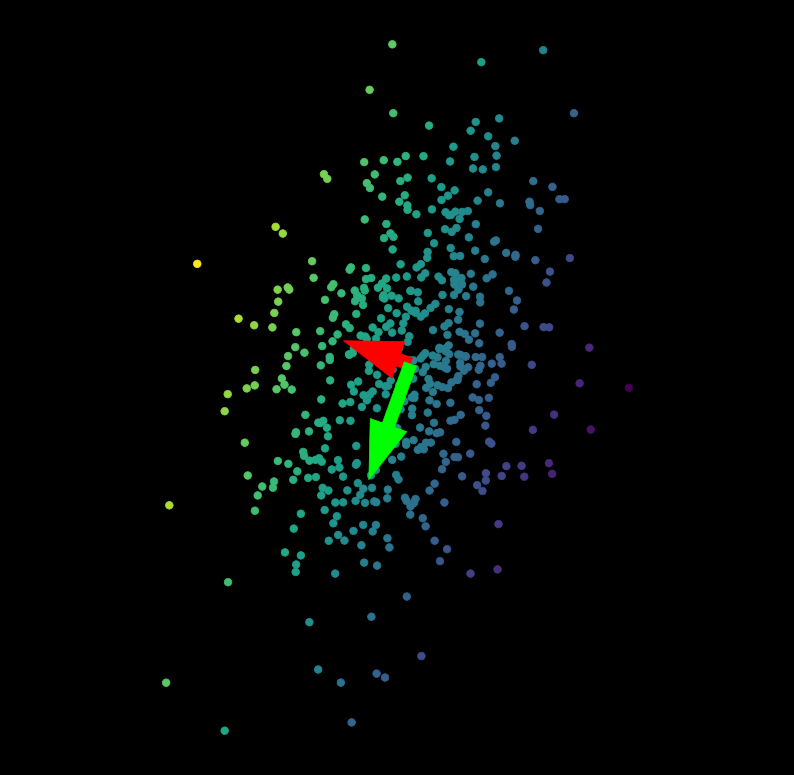

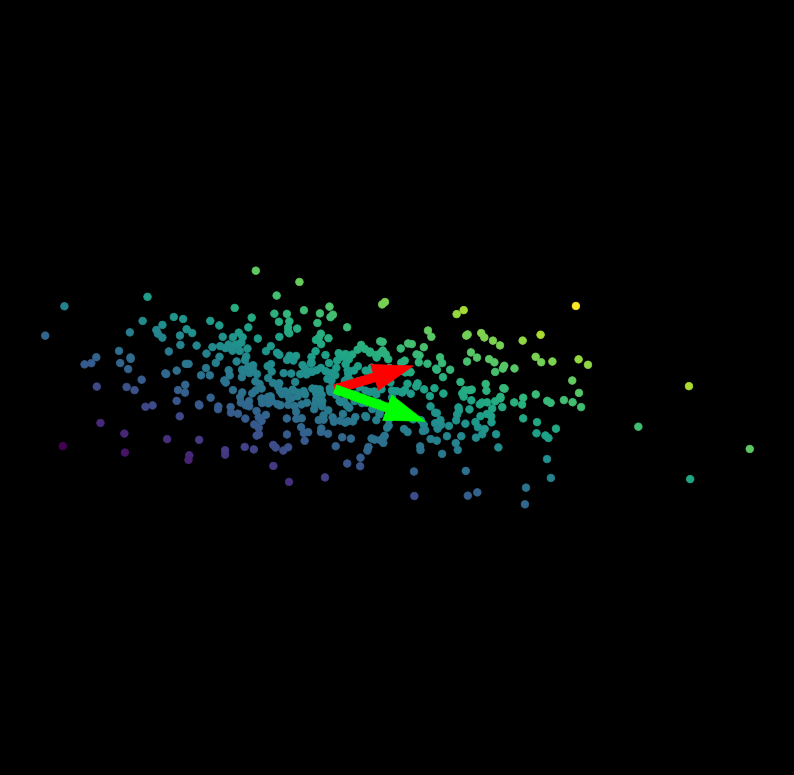

In [8]:
# Curtousy of one and only Alfredo Canziani! :)
from res.plot_lib import show_scatterplot,plot_bases
from torch import nn

colors=X[:, 0]

for _ in range(3):
    model=nn.Sequential(nn.Linear(2,2,bias=False))
    with torch.no_grad():
        Y = model(X)
        show_scatterplot(Y,colors)
        plot_bases(model(torch.cat((torch.zeros(2, 2), torch.eye(2)))))

In [9]:
from res.plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, title, axis


$$ f(x) = tanh \big(  
\begin{bmatrix}
s & 0 \\
0 & s\\
\end{bmatrix} x \big )
$$ 

Text(0.5, 1.0, 'tanh() non linearity')

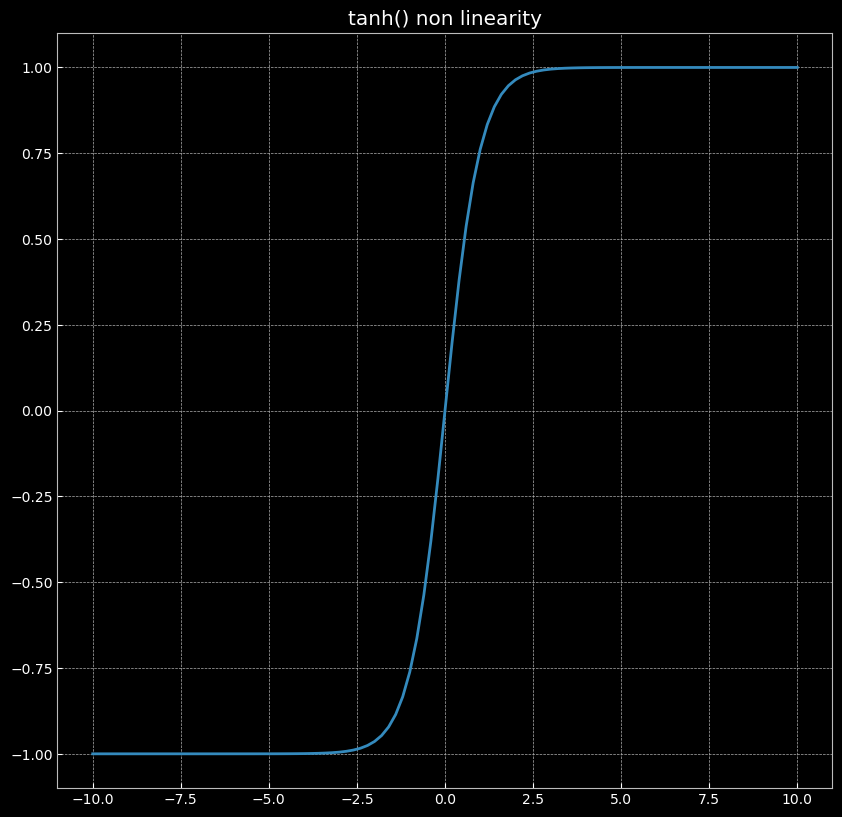

In [10]:
z = torch.linspace(-10,10,101)
s = torch.tanh(z)
plot(z.numpy(),s.numpy())
title('tanh() non linearity')

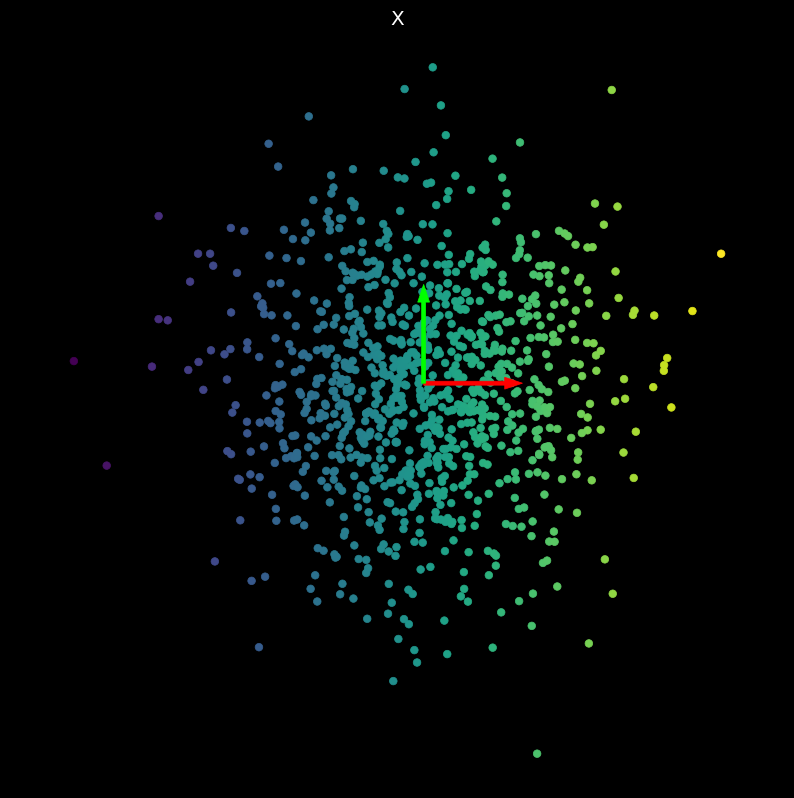

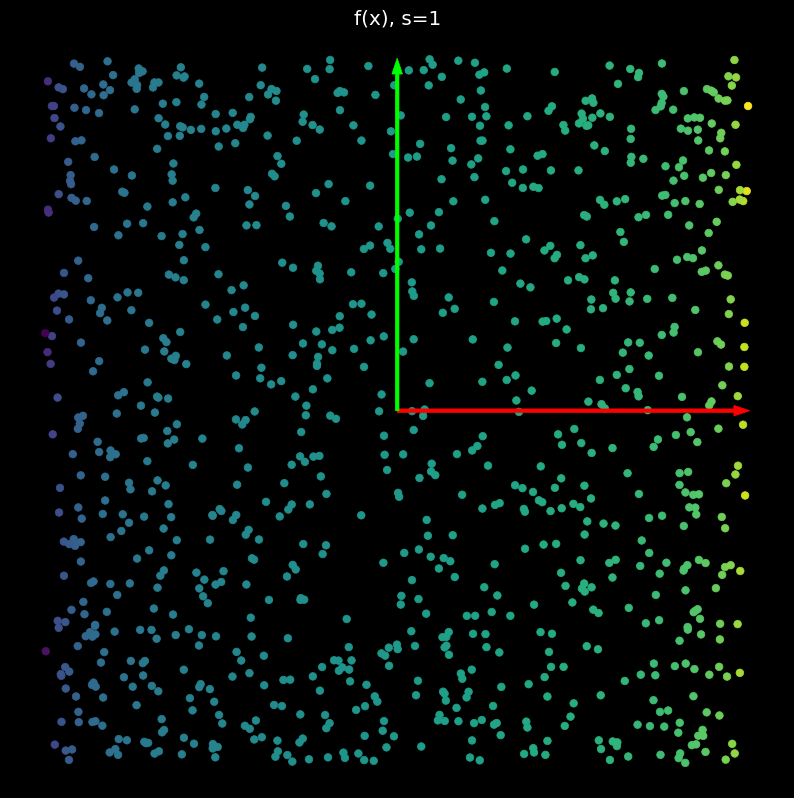

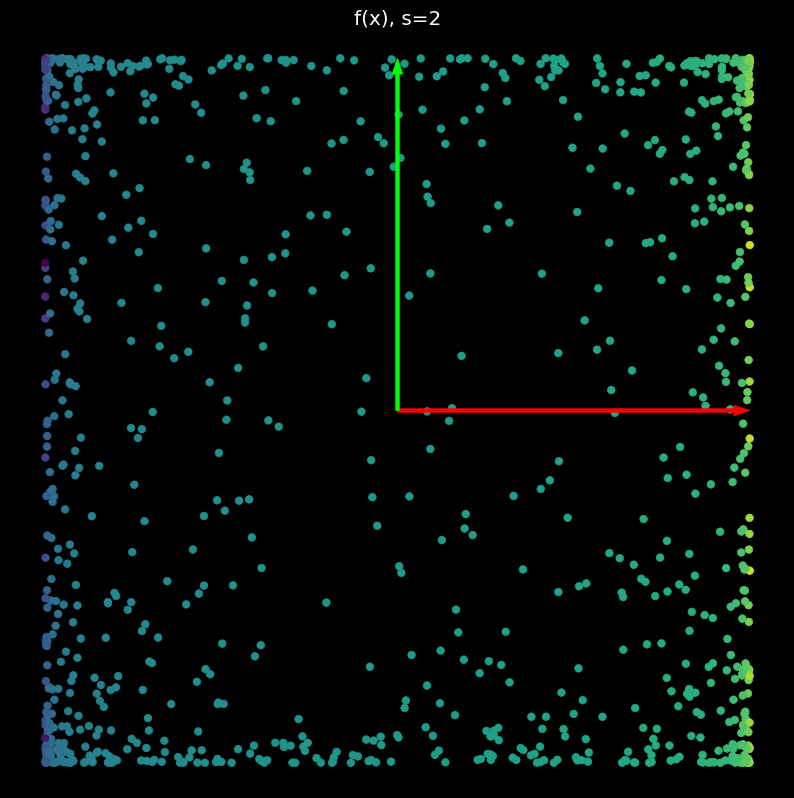

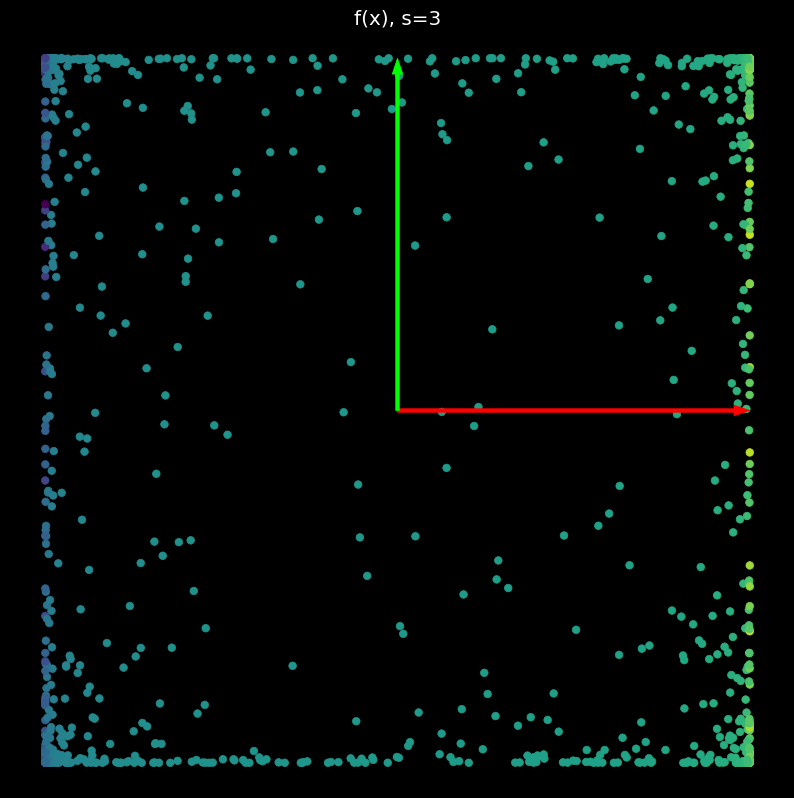

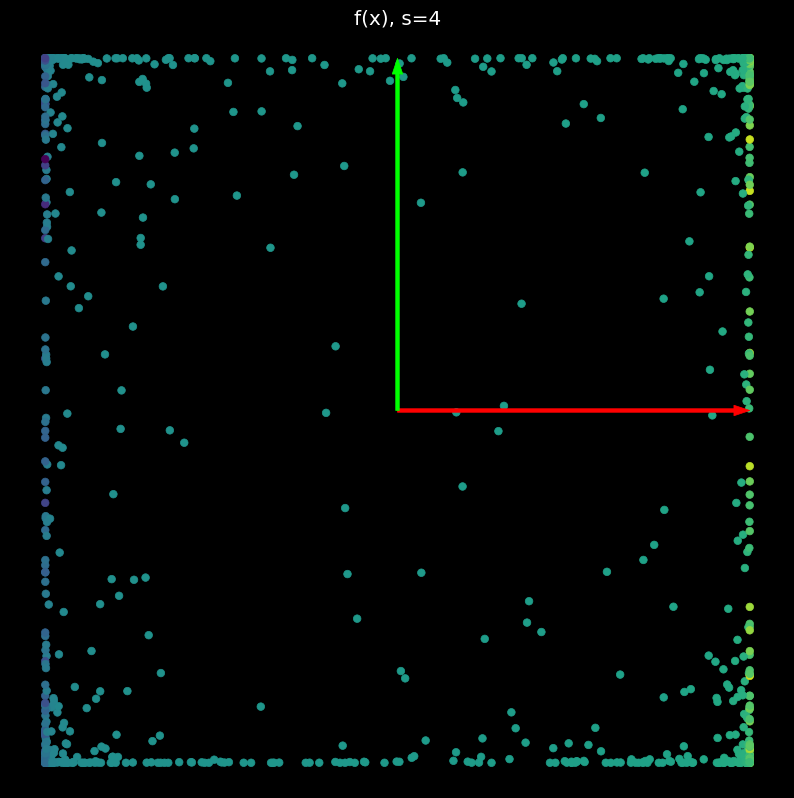

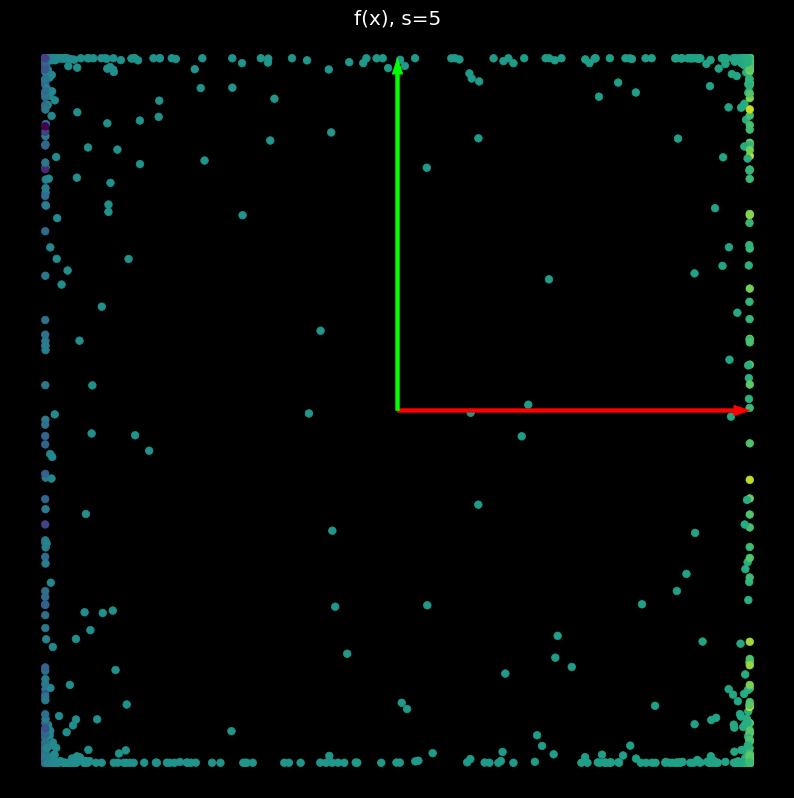

In [11]:

# Set style (needs to be in a new cell)
set_default()

# generate some points in 2-D space
n_points = 1000
X = torch.randn(n_points, 2)  # N(0,1)
colors = X[:, 0]
show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2)))
plot_bases(OI)
plt.show()
model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh())
for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)
    plt.show()

# Neural Networks = Sequence of Non-linear Transformations


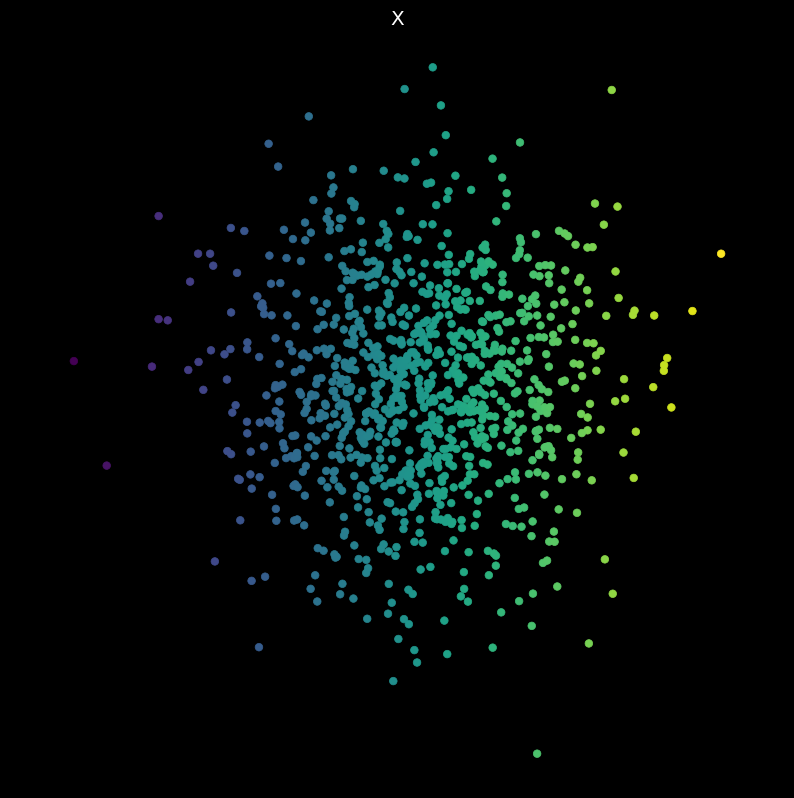

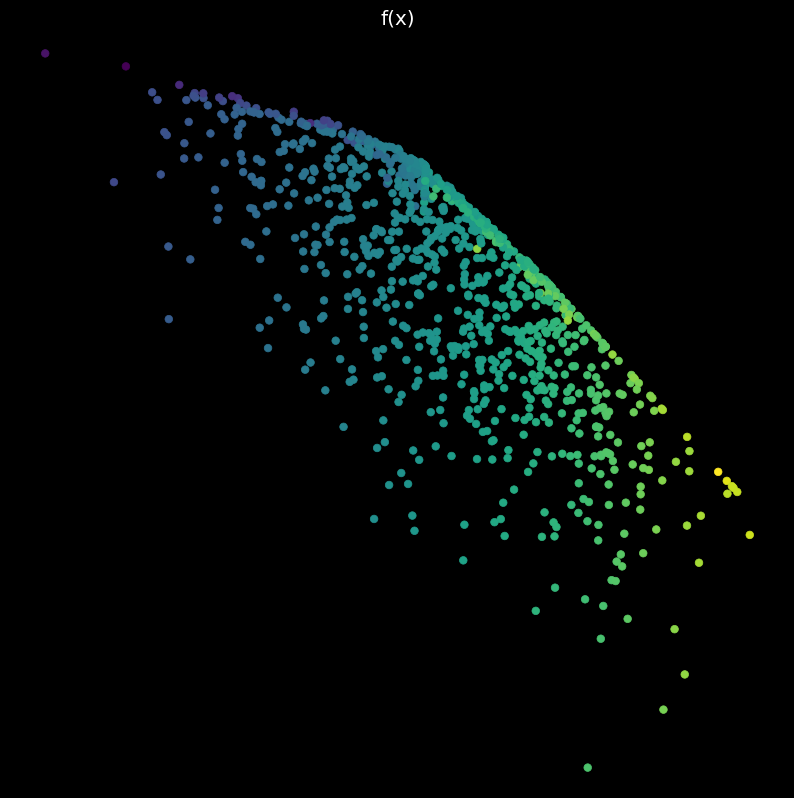

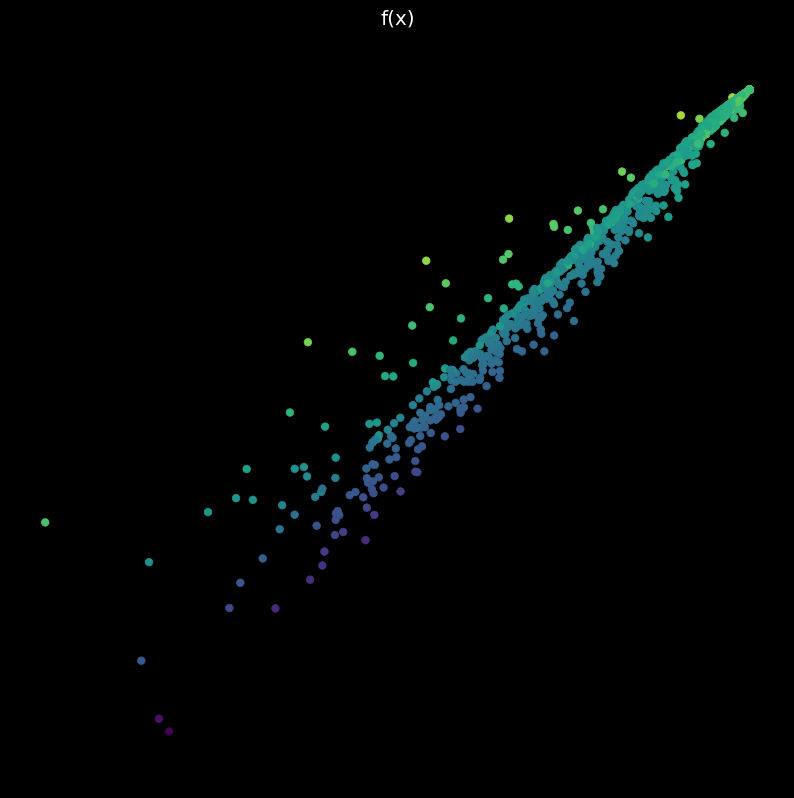

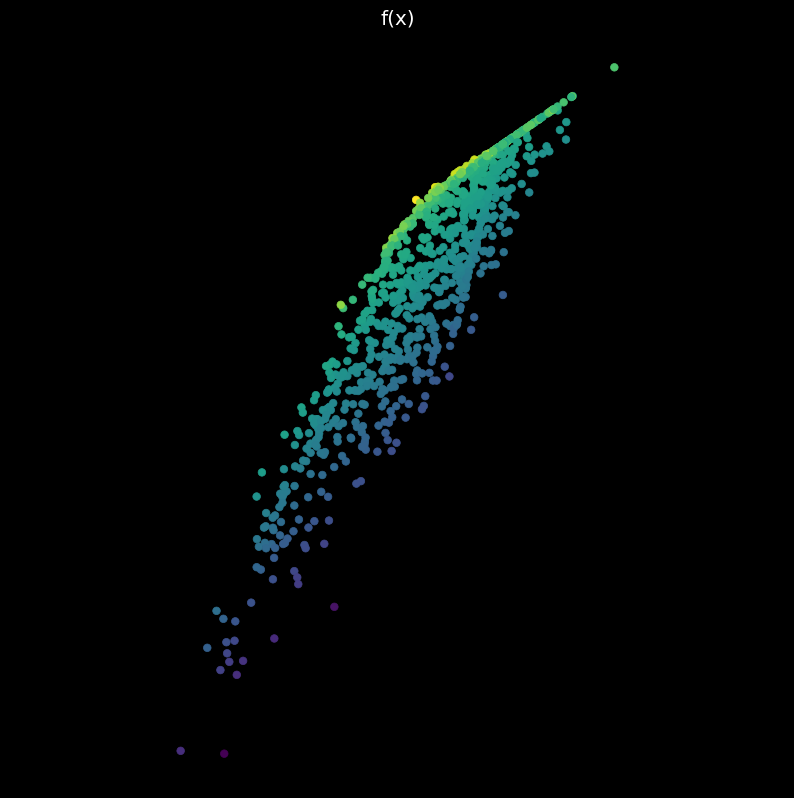

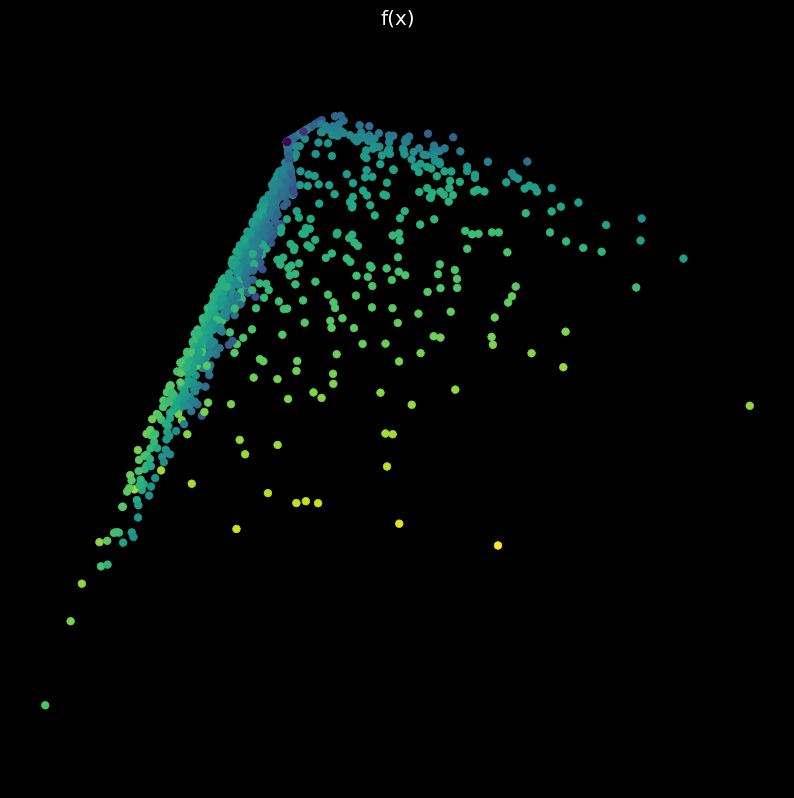

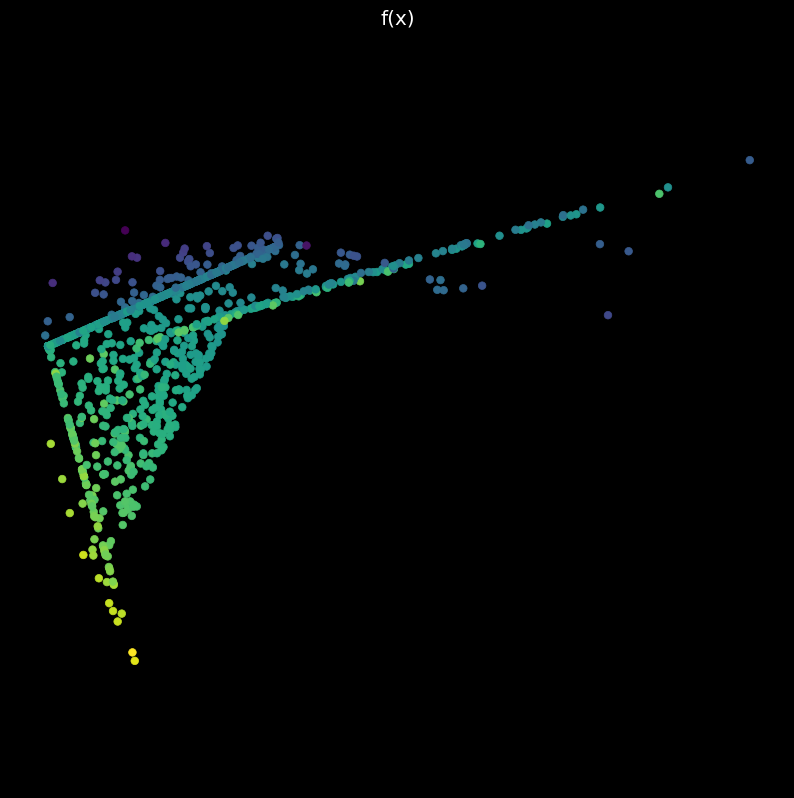

In [12]:
show_scatterplot(X, colors, title='X')

n_hidden= 5
NL=nn.ReLU()

models = []

for i in range(5):
    # create 1-layer nn
    model=nn.Sequential(
    nn.Linear(2, n_hidden),
        NL,
        nn.Linear(n_hidden,2))
    models.append(model)

    
    
    with torch.no_grad():
        Y= model(X)
    
    show_scatterplot(Y, colors, title=f'f(x)')
    plt.show()

# Congrats!

Now, I would suggest you to jump to Deep-Learning Series